In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("candy.csv") 
data = data[:6000]

In [3]:
dropcols = ['competitorname', 'peanutyalmondy', 'fruity', 'crispedricewafer', 'bar', 'pluribus', 'pricepercent']
data = data.drop(columns=dropcols)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   chocolate     85 non-null     int64  
 1   caramel       85 non-null     int64  
 2   nougat        85 non-null     int64  
 3   hard          85 non-null     int64  
 4   sugarpercent  85 non-null     float64
 5   winpercent    85 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 4.1 KB


,chocolate,caramel,nougat,hard,sugarpercent,winpercent
0,1,1,0,0,0.732,66.971725
1,1,0,1,0,0.604,67.602936
2,0,0,0,0,0.011,32.261086
3,0,0,0,0,0.011,46.116505
4,0,0,0,0,0.906,52.341465
...,...,...,...,...,...,...
80,0,0,0,0,0.220,45.466282
81,0,0,0,1,0.093,39.011898
82,0,0,0,0,0.313,44.375519
83,0,1,0,1,0.186,41.904308


In [4]:
y = data["chocolate"].astype("int")
x = data.drop("chocolate", axis=1)

In [5]:
print("\nРазмерность x.shape, y.shape")
print(x.shape, y.shape)



Размерность x.shape, y.shape
(85, 5) (85,)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
    # разбиваем выборку на тестовую и отложенную (30%)
    # Паоаметр random_state используется в качестве начального значения для генератора чисел random.
    # Это гарантирует, что наборы данных train и test не будут изменяться при каждом новом выполнении кода.
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=10)     
print("\nРазмерность X_train.shape, X_valid.shape")
print(X_train.shape, X_valid.shape)

print("\nРазмерность y_train.shape, y_valid.shape")
print(y_train.shape, y_valid.shape)


Размерность X_train.shape, X_valid.shape
(59, 5) (26, 5)

Размерность y_train.shape, y_valid.shape
(59,) (26,)


In [7]:
print("\nДерево решений")
    # Строим  дерево
first_tree = DecisionTreeClassifier(random_state=10)
first_tree = first_tree.fit(X_train,y_train) 
    # оценка модели с помощью кросс-валидации
print(cross_val_score(first_tree, X_valid, y_valid, cv=5))
    # среднее по пяти оценкам
tree_first_result = np.mean(cross_val_score(first_tree, X_valid, y_valid, cv=5))
print(tree_first_result)


Дерево решений
[1.  0.6 0.8 0.8 0.8]
0.8


[Text(0.53125, 0.9444444444444444, 'X[4] <= 47.501\ngini = 0.496\nsamples = 59\nvalue = [32, 27]'),
 Text(0.3125, 0.8333333333333334, 'X[1] <= 0.5\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.1875, 0.7222222222222222, 'X[3] <= 0.243\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(0.125, 0.6111111111111112, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.25, 0.6111111111111112, 'X[3] <= 0.366\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.1875, 0.5, 'X[4] <= 43.722\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.125, 0.3888888888888889, 'X[4] <= 30.653\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0625, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3125, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.4375, 0.7222222222222222, 'X[3] <= 0.534\ngini = 0.5\ns

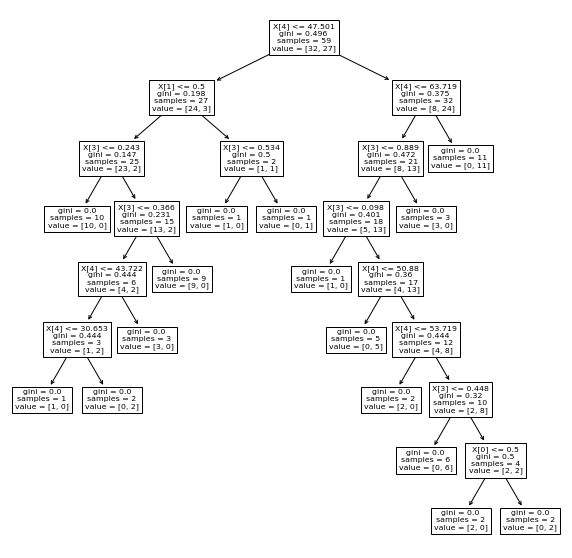

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(first_tree)

In [9]:
print("\nМетод k ближайших соседей")
    # метод k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
    # строим первую оценку
first_knn = KNeighborsClassifier()
    # оценка модели с помощью кросс-валидации
print(cross_val_score(first_knn, X_train.values, y_train.values, cv=5))
    # среднее по пяти оценкам
knn_first_result = np.mean(cross_val_score(first_knn, X_train.values, y_train.values, cv=5))
print(knn_first_result)


Метод k ближайших соседей
[0.75       0.83333333 0.66666667 0.75       0.90909091]
0.7818181818181819


In [10]:
# SVC method 
print("\n Метод SVC")
#split dataset in features and target variable
feature_cols = ['caramel', 'nougat', 'hard', 'sugarpercent', 'winpercent']
X = data[feature_cols] # Features
y = data.chocolate # Target variable


 Метод SVC


In [11]:
# split X and y into training and testing sets
from sklearn.model_selection import cross_val_score, train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
# import the class
from sklearn.svm import SVC

# instantiate the model (using the default parameters)
model_SVC = SVC(kernel='linear',C=1)

# fit the model with data
model_SVC.fit(X_train,y_train)

model_SVC.score(X_train, y_train)

0.8253968253968254

In [13]:
# calculate the predicted values
y_pred=model_SVC.predict(X_test)

In [14]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12,  1],
       [ 5,  4]], dtype=int64)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7272727272727273
Precision: 0.8
Recall: 0.4444444444444444


In [16]:
data

,chocolate,caramel,nougat,hard,sugarpercent,winpercent
0,1,1,0,0,0.732,66.971725
1,1,0,1,0,0.604,67.602936
2,0,0,0,0,0.011,32.261086
3,0,0,0,0,0.011,46.116505
4,0,0,0,0,0.906,52.341465
...,...,...,...,...,...,...
80,0,0,0,0,0.220,45.466282
81,0,0,0,1,0.093,39.011898
82,0,0,0,0,0.313,44.375519
83,0,1,0,1,0.186,41.904308


In [17]:
print("\nУлучшаем модель DT. Настраиваем max_depth для дерева")
    # Улучшаем модель DT. Настраиваем max_depth для дерева
from sklearn.model_selection import GridSearchCV
    # Устанавливаем параметры дерева
tree_params = {"max_depth": np.arange(1, 11), "max_features": [1, 3, 5]}
    # GridSearchCV оптимизация путем перекрестного поиска по сетке параметров:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)
    
    # Выполняем прогонку со всеми наборами параметров 
tree_grid.fit(X_train, y_train)
    # Выводим лучшие параметры для оптимизации
print("Лучшие параметры для оптимизации")
print(tree_grid.best_score_, tree_grid.best_params_)



Улучшаем модель DT. Настраиваем max_depth для дерева
Лучшие параметры для оптимизации
0.8102564102564103 {'max_depth': 5, 'max_features': 5}


In [18]:
print("\nУлучшаем модель knn")
    # Улучшаем модель knn
    # заполняем предлагаемые параметры
knn_params = {"n_neighbors": range(5, 30, 5)} 
    # производим оценку параметров
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)
    # Выводим затраченное время
%time
    # Выполняем прогонку со всеми наборами параметров 
knn_grid.fit(X_train.values, y_train.values);
    # Выводим лучшие параметры для оптимизации
print("Лучшие параметры для оптимизации")
print(knn_grid.best_score_, knn_grid.best_params_)


Улучшаем модель knn
Wall time: 0 ns
Лучшие параметры для оптимизации
0.8294871794871795 {'n_neighbors': 5}



Улучшаем модель SVC. Редактируем параметры гамма и C, проводим нормализацию 


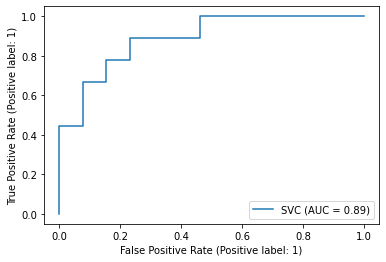

In [19]:
print("\nУлучшаем модель SVC. Редактируем параметры гамма и C, проводим нормализацию ")
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model_SVC, X_test, y_test)

In [20]:
from sklearn.model_selection import GridSearchCV
SVC_params = {"C": [0.5, 1], "gamma": [0.2,0.6, 1]}
SVC_grid = GridSearchCV(model_SVC, SVC_params, cv=5, n_jobs=-1)

In [21]:
 %%time
SVC_grid.fit(X_train, y_train);

Wall time: 111 ms


GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'gamma': [0.2, 0.6, 1]})

In [22]:
from sklearn import preprocessing
d = preprocessing.normalize(X, axis=0)
X_norm = pd.DataFrame(d, columns=feature_cols)
X_norm.head()
# y не нормаизуем (0,1)

,caramel,nougat,hard,sugarpercent,winpercent
0,0.267261,0.000000,0.0,0.143033,0.138628
1,0.000000,0.377964,0.0,0.118022,0.139935
2,0.000000,0.000000,0.0,0.002149,0.066779
3,0.000000,0.000000,0.0,0.002149,0.095459
4,0.000000,0.000000,0.0,0.177033,0.108344


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.25,random_state=0)

In [24]:
y_train.head()

42    1
66    0
80    0
52    1
69    0
Name: chocolate, dtype: int64

In [25]:
X_train.head()

,caramel,nougat,hard,sugarpercent,winpercent
42,0.0,0.0,0.000000,0.118022,0.146420
66,0.0,0.0,0.000000,0.013483,0.123916
80,0.0,0.0,0.000000,0.042988,0.094113
52,0.0,0.0,0.000000,0.140689,0.174249
69,0.0,0.0,0.258199,0.111183,0.071577


In [26]:
print("\nРезультат:")
# instantiate the model (using the default parameters)

model_SVC_norm = SVC(kernel='linear')

# fit the model with data
model_SVC_norm.fit(X_train,y_train)

model_SVC_norm.score(X_train, y_train)


Результат:


0.6031746031746031

In [27]:
print("\nВЫВОД В данном примере лучшие результаты показала модель:")
print("До настройки: ", 
      ( "дерево" if tree_first_result > knn_first_result else "оба метода" if tree_first_result == knn_first_result else  "метод ближайших соседей" ),
      ", с точностью -",
      ( tree_first_result if tree_first_result > knn_first_result else tree_first_result if tree_first_result == knn_first_result else knn_first_result ) )
print("После настройки - ", ( "дерево" if tree_grid.best_score_ > knn_grid.best_score_ else "оба метода" if tree_grid.best_score_ == knn_grid.best_score_ else "метод ближайших соседей" ),
      ", с точностью -",
      ( tree_grid.best_score_ if tree_grid.best_score_ > knn_grid.best_score_ else tree_grid.best_score_ if tree_grid.best_score_ == knn_grid.best_score_ else knn_grid.best_score_ ))


ВЫВОД В данном примере лучшие результаты показала модель:
До настройки:  дерево , с точностью - 0.8
После настройки -  метод ближайших соседей , с точностью - 0.8294871794871795


In [28]:

    # Рассчитаем оценку модели DT на отложенной выборке
    # прогноз на отложенной выборке
tree_valid_pred = tree_grid.predict(X_valid) 
    # первые 50 спрогнозированых меток
print("первые 50 спрогнозированых меток")
print(tree_valid_pred[0:50])
    # Доля верных ответов в прогнозах
from sklearn.metrics import accuracy_score
print("Доля верных ответов в прогнозах")
print(accuracy_score(y_valid, tree_valid_pred))
 

первые 50 спрогнозированых меток
[0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]
Доля верных ответов в прогнозах
0.9230769230769231


In [29]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
data = pd.read_csv("candy.csv")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

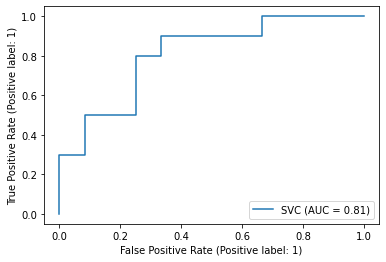

In [30]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

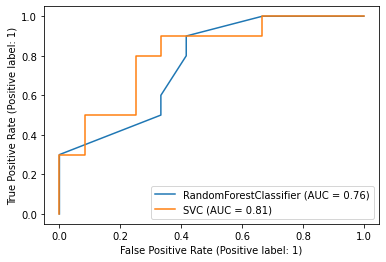

In [31]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax)
svc_disp.plot(ax=ax)
plt.show()